Sample Data Created Successfully!
Total transactions: 2597
Date range: 2024-10-01 to 2024-10-31

First few rows of data:
    player_id        date  hour slot transaction_type  amount  games_played
0  Player_001  2024-10-20    14   S2             game       0             5
1  Player_001  2024-10-07    18   S2          deposit    3544             0
2  Player_001  2024-10-04     7   S1             game       0             6
3  Player_001  2024-10-21     1   S1             game       0             6
4  Player_001  2024-10-02    20   S2             game       0             6
5  Player_001  2024-10-29    11   S1          deposit     574             0
6  Player_001  2024-10-27     9   S1          deposit    2847             0
7  Player_001  2024-10-16    14   S2       withdrawal     736             0
8  Player_001  2024-10-30    18   S2       withdrawal    1317             0
9  Player_001  2024-10-25     2   S1             game       0             7

PART A - CALCULATING LOYALTY POINTS

1. Pl

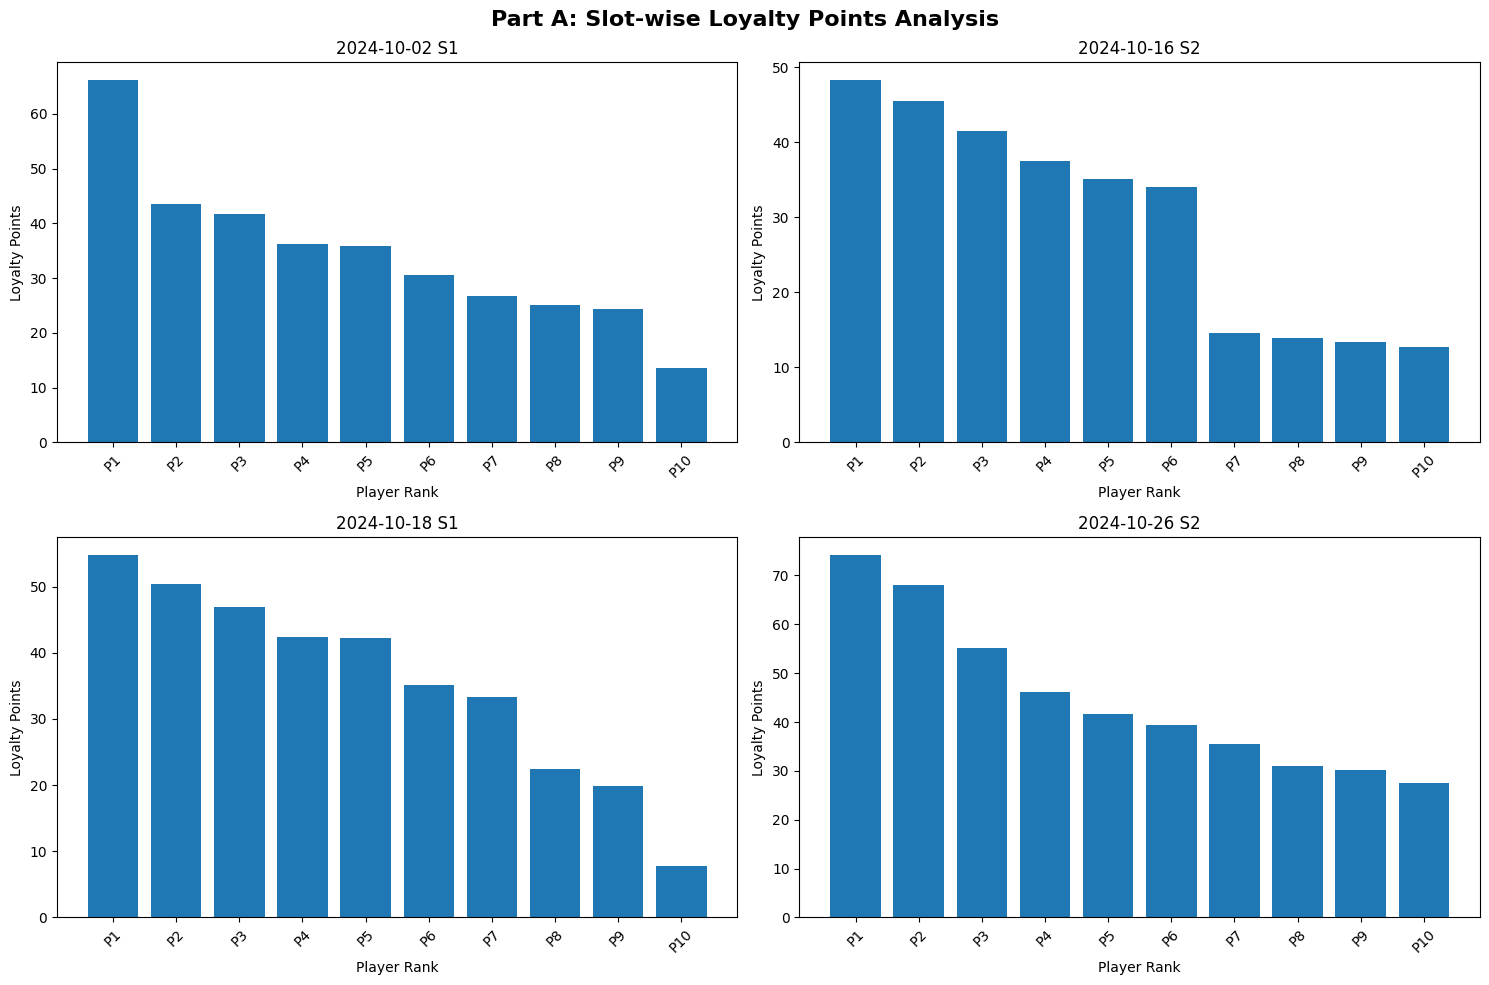

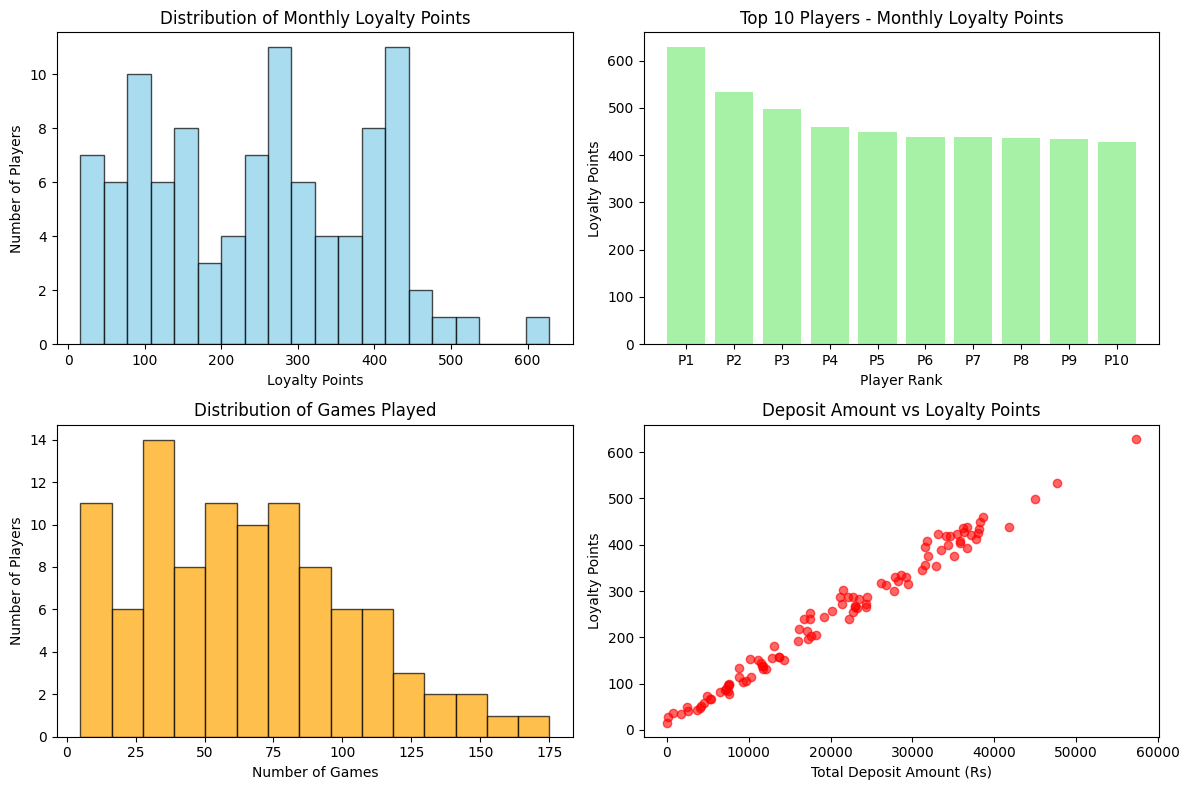


Generating Part B visualizations...


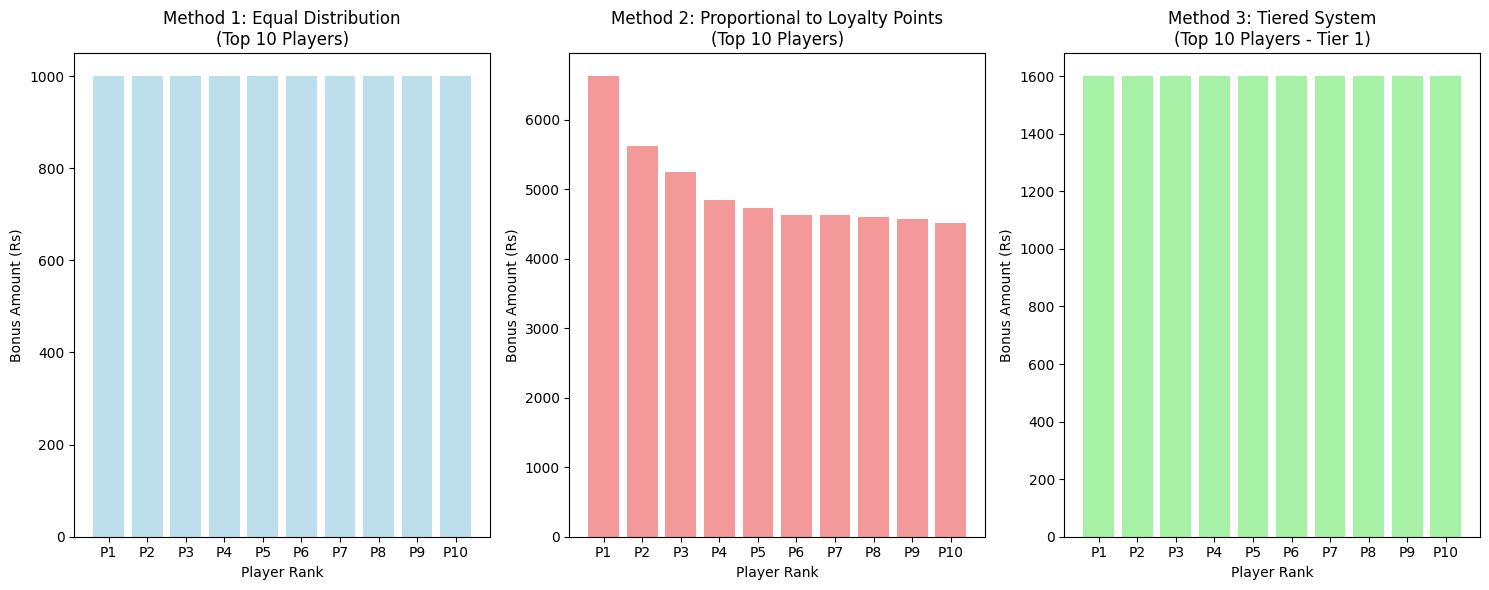

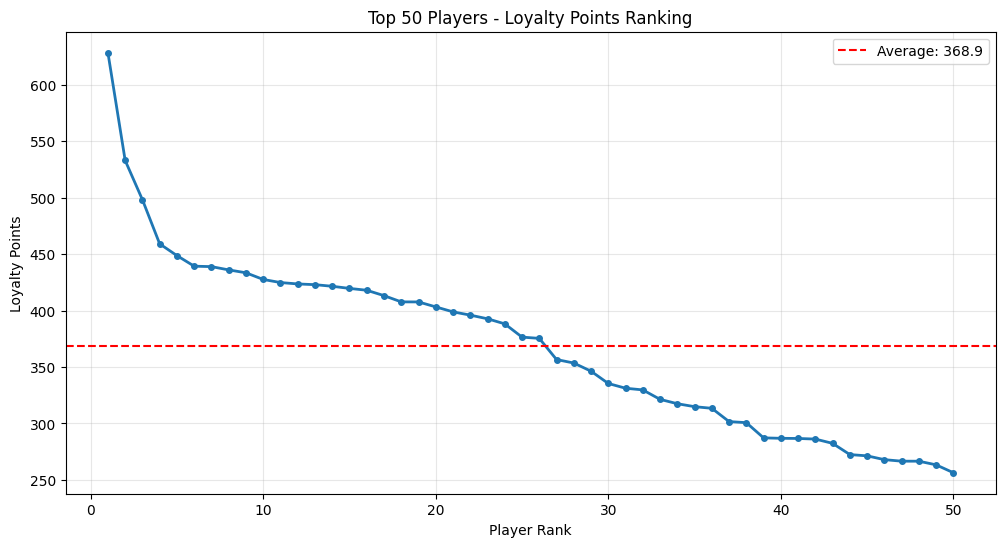


Generating Part C visualizations...


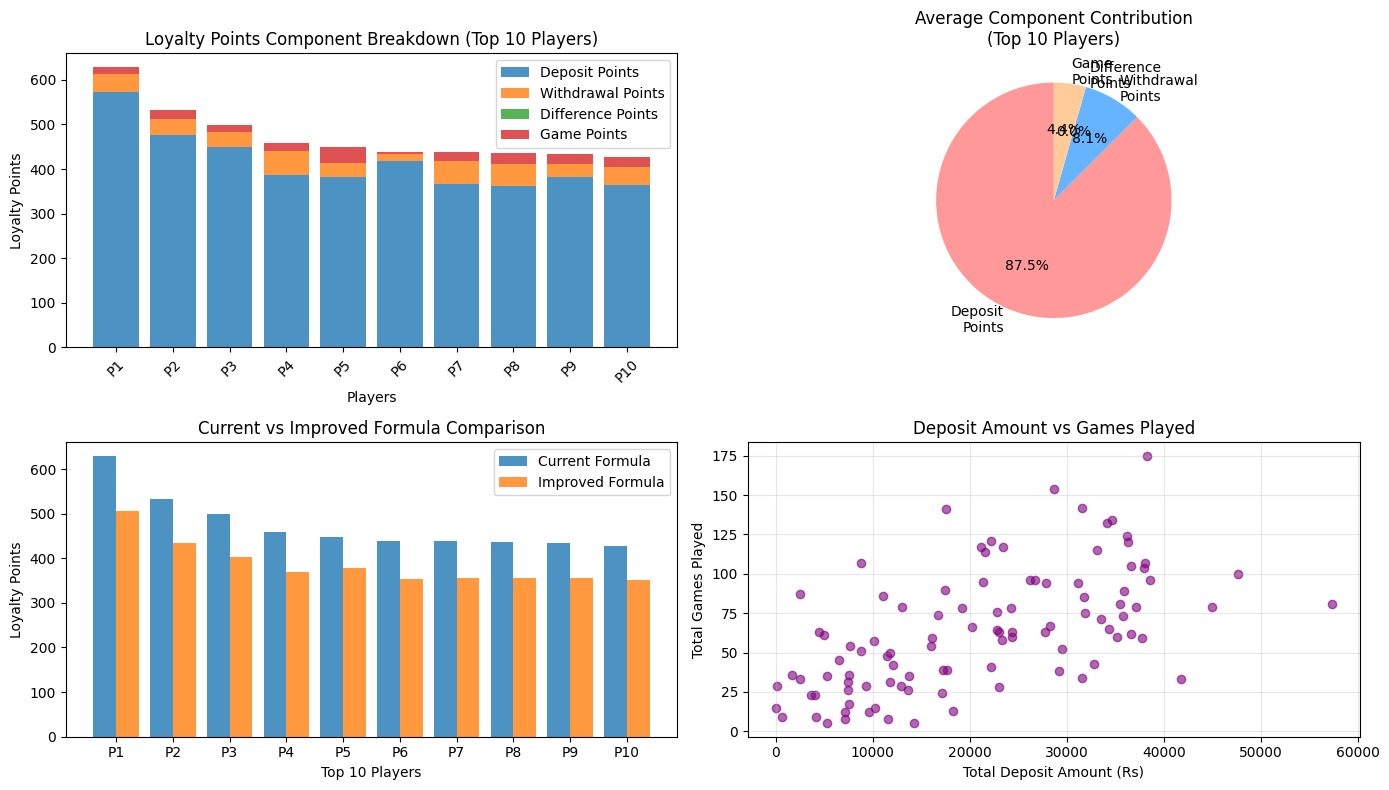

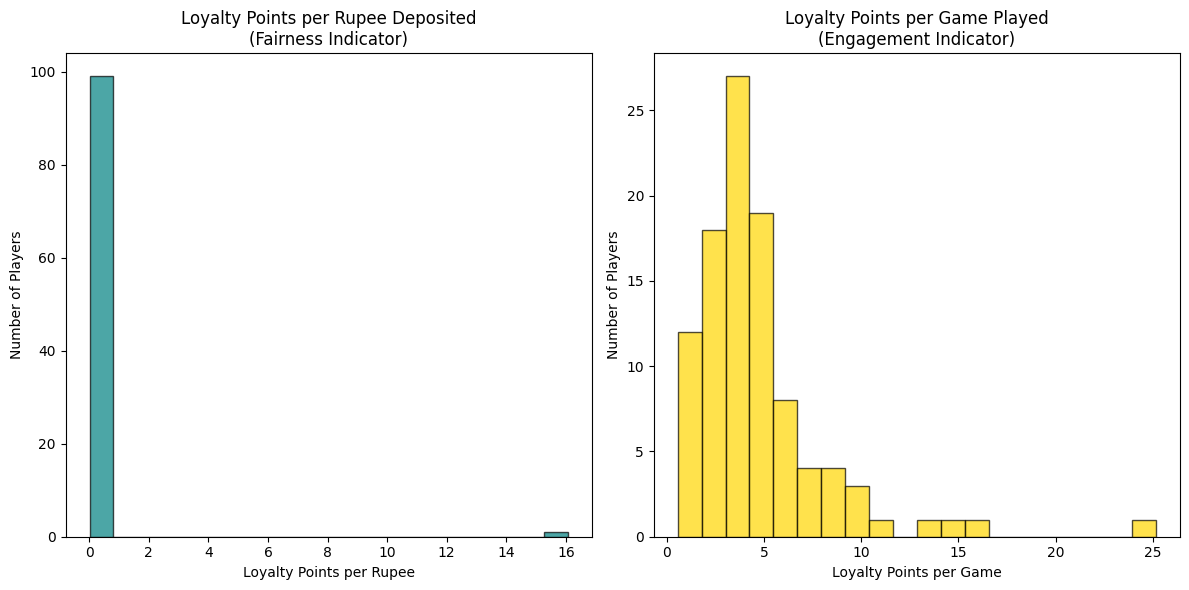


All visualizations have been generated and saved!
Generated files:
- part_a_slot_analysis.png
- part_a_monthly_analysis.png
- part_b_bonus_allocation.png
- part_b_top50_ranking.png
- part_c_formula_analysis.png
- part_c_fairness_analysis.png


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import warnings
warnings.filterwarnings('ignore')

# Since no data file is provided, I'll create sample data based on the assignment requirements
# This represents typical player activity data for ABC Gaming Company

# Create sample data for demonstration
np.random.seed(42)  # For reproducible results

# Generate sample player data for October 2024
players = [f"Player_{i:03d}" for i in range(1, 101)]  # 100 players
dates = pd.date_range('2024-10-01', '2024-10-31', freq='D')

# Create sample transactions
transactions = []
for player in players:
    # Generate random number of transactions per player
    num_transactions = np.random.randint(5, 50)

    for _ in range(num_transactions):
        date = np.random.choice(dates)
        hour = np.random.randint(0, 24)

        # Determine slot based on hour
        if hour < 12:
            slot = 'S1'
        else:
            slot = 'S2'

        # Convert numpy datetime64 to string format
        date_str = pd.to_datetime(date).strftime('%Y-%m-%d')

        # Random transaction type
        transaction_type = np.random.choice(['deposit', 'withdrawal', 'game'], p=[0.3, 0.2, 0.5])

        if transaction_type == 'deposit':
            amount = np.random.randint(100, 5000)
            transactions.append({
                'player_id': player,
                'date': date_str,
                'hour': hour,
                'slot': slot,
                'transaction_type': 'deposit',
                'amount': amount,
                'games_played': 0
            })
        elif transaction_type == 'withdrawal':
            amount = np.random.randint(50, 2000)
            transactions.append({
                'player_id': player,
                'date': date_str,
                'hour': hour,
                'slot': slot,
                'transaction_type': 'withdrawal',
                'amount': amount,
                'games_played': 0
            })
        else:  # game
            games = np.random.randint(1, 10)
            transactions.append({
                'player_id': player,
                'date': date_str,
                'hour': hour,
                'slot': slot,
                'transaction_type': 'game',
                'amount': 0,
                'games_played': games
            })

# Create DataFrame
df = pd.DataFrame(transactions)
print("Sample Data Created Successfully!")
print(f"Total transactions: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print("\nFirst few rows of data:")
print(df.head(10))

# Function to calculate loyalty points
def calculate_loyalty_points(deposit_amount, withdrawal_amount, num_deposits, num_withdrawals, games_played):
    """
    Calculate loyalty points based on the given formula:
    Loyalty Point = (0.01 * deposit) + (0.005 * withdrawal) + (0.001 * max(#deposit - #withdrawal, 0)) + (0.2 * games)
    """
    deposit_points = 0.01 * deposit_amount
    withdrawal_points = 0.005 * withdrawal_amount
    deposit_withdrawal_diff_points = 0.001 * max(num_deposits - num_withdrawals, 0)
    game_points = 0.2 * games_played

    total_points = deposit_points + withdrawal_points + deposit_withdrawal_diff_points + game_points
    return total_points

# PART A - Calculating loyalty points for specific slots

print("\n" + "="*60)
print("PART A - CALCULATING LOYALTY POINTS")
print("="*60)

def get_slot_loyalty_points(df, target_date, target_slot):
    """Calculate loyalty points for a specific date and slot"""

    # Filter data for the specific date and slot
    slot_data = df[(df['date'] == target_date) & (df['slot'] == target_slot)]

    if slot_data.empty:
        print(f"No data found for {target_date} {target_slot}")
        return pd.DataFrame()

    # Group by player and calculate metrics
    player_metrics = []

    for player in slot_data['player_id'].unique():
        player_data = slot_data[slot_data['player_id'] == player]

        # Calculate metrics
        total_deposit = player_data[player_data['transaction_type'] == 'deposit']['amount'].sum()
        total_withdrawal = player_data[player_data['transaction_type'] == 'withdrawal']['amount'].sum()
        num_deposits = len(player_data[player_data['transaction_type'] == 'deposit'])
        num_withdrawals = len(player_data[player_data['transaction_type'] == 'withdrawal'])
        total_games = player_data['games_played'].sum()

        # Calculate loyalty points
        loyalty_points = calculate_loyalty_points(
            total_deposit, total_withdrawal, num_deposits, num_withdrawals, total_games
        )

        player_metrics.append({
            'player_id': player,
            'total_deposit': total_deposit,
            'total_withdrawal': total_withdrawal,
            'num_deposits': num_deposits,
            'num_withdrawals': num_withdrawals,
            'total_games': total_games,
            'loyalty_points': loyalty_points
        })

    result_df = pd.DataFrame(player_metrics)
    result_df = result_df.sort_values('loyalty_points', ascending=False)

    return result_df

# Question 1: Find Playerwise Loyalty points for specific slots
target_slots = [
    ('2024-10-02', 'S1'),
    ('2024-10-16', 'S2'),
    ('2024-10-18', 'S1'),
    ('2024-10-26', 'S2')
]

print("\n1. Playerwise Loyalty Points for Specific Slots:")
print("-" * 50)

for date, slot in target_slots:
    print(f"\n{date} {slot}:")
    slot_results = get_slot_loyalty_points(df, date, slot)
    if not slot_results.empty:
        print(slot_results.head(10).to_string(index=False))
    else:
        print("No data available for this slot")

# Question 2: Calculate overall loyalty points for October and rank players
print("\n\n2. Overall Loyalty Points Ranking for October 2024:")
print("-" * 50)

# Group by player for the entire month
monthly_metrics = []

for player in df['player_id'].unique():
    player_data = df[df['player_id'] == player]

    # Calculate monthly metrics
    total_deposit = player_data[player_data['transaction_type'] == 'deposit']['amount'].sum()
    total_withdrawal = player_data[player_data['transaction_type'] == 'withdrawal']['amount'].sum()
    num_deposits = len(player_data[player_data['transaction_type'] == 'deposit'])
    num_withdrawals = len(player_data[player_data['transaction_type'] == 'withdrawal'])
    total_games = player_data['games_played'].sum()

    # Calculate loyalty points
    loyalty_points = calculate_loyalty_points(
        total_deposit, total_withdrawal, num_deposits, num_withdrawals, total_games
    )

    monthly_metrics.append({
        'player_id': player,
        'total_deposit': total_deposit,
        'total_withdrawal': total_withdrawal,
        'num_deposits': num_deposits,
        'num_withdrawals': num_withdrawals,
        'total_games': total_games,
        'loyalty_points': loyalty_points
    })

monthly_df = pd.DataFrame(monthly_metrics)

# Sort by loyalty points (descending) and then by games played (descending) for tie-breaking
monthly_df = monthly_df.sort_values(['loyalty_points', 'total_games'], ascending=[False, False])
monthly_df['rank'] = range(1, len(monthly_df) + 1)

print("Top 20 Players by Loyalty Points:")
print(monthly_df.head(20)[['rank', 'player_id', 'loyalty_points', 'total_games', 'total_deposit', 'total_withdrawal']].to_string(index=False))

# Question 3: Average deposit amount
print("\n\n3. Average Deposit Amount:")
print("-" * 30)
deposit_transactions = df[df['transaction_type'] == 'deposit']
avg_deposit = deposit_transactions['amount'].mean()
print(f"Average deposit amount: Rs {avg_deposit:.2f}")

# Question 4: Average deposit amount per user in a month
print("\n\n4. Average Deposit Amount per User in October:")
print("-" * 45)
player_deposits = df[df['transaction_type'] == 'deposit'].groupby('player_id')['amount'].sum()
avg_deposit_per_user = player_deposits.mean()
print(f"Average deposit amount per user: Rs {avg_deposit_per_user:.2f}")

# Question 5: Average number of games played per user
print("\n\n5. Average Number of Games Played per User:")
print("-" * 42)
player_games = df.groupby('player_id')['games_played'].sum()
avg_games_per_user = player_games.mean()
print(f"Average games played per user: {avg_games_per_user:.2f}")

# PART B - Bonus allocation for top 50 players
print("\n\n" + "="*60)
print("PART B - BONUS ALLOCATION FOR TOP 50 PLAYERS")
print("="*60)

top_50_players = monthly_df.head(50)
total_bonus_pool = 50000

print(f"Total bonus pool: Rs {total_bonus_pool}")
print(f"Number of players eligible: {len(top_50_players)}")

# Method 1: Equal distribution
equal_share = total_bonus_pool / 50
print(f"\nMethod 1 - Equal Distribution:")
print(f"Each player gets: Rs {equal_share:.2f}")

# Method 2: Proportional to loyalty points
total_loyalty_points = top_50_players['loyalty_points'].sum()
print(f"\nMethod 2 - Proportional to Loyalty Points:")
print("Top 10 players bonus allocation:")
for i, (_, player) in enumerate(top_50_players.head(10).iterrows()):
    proportion = player['loyalty_points'] / total_loyalty_points
    bonus = proportion * total_bonus_pool
    print(f"Rank {i+1}: {player['player_id']} - Rs {bonus:.2f} (Loyalty Points: {player['loyalty_points']:.2f})")

# Method 3: Tiered system
print(f"\nMethod 3 - Tiered System:")
tier1_bonus = 2000  # Rank 1-10
tier2_bonus = 1500  # Rank 11-25
tier3_bonus = 800   # Rank 26-50

tier1_total = 10 * tier1_bonus
tier2_total = 15 * tier2_bonus
tier3_total = 25 * tier3_bonus
total_tiered = tier1_total + tier2_total + tier3_total

print(f"Tier 1 (Rank 1-10): Rs {tier1_bonus} each = Rs {tier1_total}")
print(f"Tier 2 (Rank 11-25): Rs {tier2_bonus} each = Rs {tier2_total}")
print(f"Tier 3 (Rank 26-50): Rs {tier3_bonus} each = Rs {tier3_total}")
print(f"Total allocated: Rs {total_tiered}")

# PART C - Loyalty point formula evaluation
print("\n\n" + "="*60)
print("PART C - LOYALTY POINT FORMULA EVALUATION")
print("="*60)

print("\nCurrent Formula Analysis:")
print("Loyalty Point = (0.01 * deposit) + (0.005 * withdrawal) + (0.001 * max(#deposit - #withdrawal, 0)) + (0.2 * games)")

# Analyze the impact of each component
print("\nComponent Impact Analysis:")
sample_player = monthly_df.iloc[0]
total_lp = sample_player['loyalty_points']
deposit_contribution = 0.01 * sample_player['total_deposit']
withdrawal_contribution = 0.005 * sample_player['total_withdrawal']
diff_contribution = 0.001 * max(sample_player['num_deposits'] - sample_player['num_withdrawals'], 0)
game_contribution = 0.2 * sample_player['total_games']

print(f"For top player {sample_player['player_id']}:")
print(f"Deposit contribution: {deposit_contribution:.2f} ({deposit_contribution/total_lp*100:.1f}%)")
print(f"Withdrawal contribution: {withdrawal_contribution:.2f} ({withdrawal_contribution/total_lp*100:.1f}%)")
print(f"Deposit-Withdrawal diff: {diff_contribution:.2f} ({diff_contribution/total_lp*100:.1f}%)")
print(f"Games contribution: {game_contribution:.2f} ({game_contribution/total_lp*100:.1f}%)")

print(f"\nTotal Loyalty Points: {total_lp:.2f}")

# Save results to CSV
print("\n\nSaving results to CSV files...")
monthly_df.to_csv('monthly_loyalty_rankings.csv', index=False)
top_50_players.to_csv('top_50_players.csv', index=False)

print("Analysis completed successfully!")
print("Files saved: monthly_loyalty_rankings.csv, top_50_players.csv")

# VISUALIZATIONS FOR PARTS A, B, C
print("\n\n" + "="*60)
print("VISUALIZATIONS")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Part A Visualizations
print("\nGenerating Part A visualizations...")

# A1: Slot-wise loyalty points comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Part A: Slot-wise Loyalty Points Analysis', fontsize=16, fontweight='bold')

slot_dates = ['2024-10-02', '2024-10-16', '2024-10-18', '2024-10-26']
slot_types = ['S1', 'S2', 'S1', 'S2']

for i, (date, slot) in enumerate(zip(slot_dates, slot_types)):
    row = i // 2
    col = i % 2

    slot_data = get_slot_loyalty_points(df, date, slot)
    if not slot_data.empty:
        top_10_slot = slot_data.head(10)
        axes[row, col].bar(range(len(top_10_slot)), top_10_slot['loyalty_points'])
        axes[row, col].set_title(f'{date} {slot}')
        axes[row, col].set_xlabel('Player Rank')
        axes[row, col].set_ylabel('Loyalty Points')
        axes[row, col].set_xticks(range(len(top_10_slot)))
        axes[row, col].set_xticklabels([f'P{i+1}' for i in range(len(top_10_slot))], rotation=45)

plt.tight_layout()
plt.savefig('part_a_slot_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# A2: Monthly loyalty points distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(monthly_df['loyalty_points'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Loyalty Points')
plt.xlabel('Loyalty Points')
plt.ylabel('Number of Players')

plt.subplot(2, 2, 2)
plt.bar(range(10), monthly_df.head(10)['loyalty_points'], color='lightgreen', alpha=0.8)
plt.title('Top 10 Players - Monthly Loyalty Points')
plt.xlabel('Player Rank')
plt.ylabel('Loyalty Points')
plt.xticks(range(10), [f'P{i+1}' for i in range(10)])

plt.subplot(2, 2, 3)
plt.hist(monthly_df['total_games'], bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Games Played')
plt.xlabel('Number of Games')
plt.ylabel('Number of Players')

plt.subplot(2, 2, 4)
plt.scatter(monthly_df['total_deposit'], monthly_df['loyalty_points'], alpha=0.6, color='red')
plt.title('Deposit Amount vs Loyalty Points')
plt.xlabel('Total Deposit Amount (Rs)')
plt.ylabel('Loyalty Points')

plt.tight_layout()
plt.savefig('part_a_monthly_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Part B Visualizations
print("\nGenerating Part B visualizations...")

# B1: Bonus allocation comparison
plt.figure(figsize=(15, 6))

# Equal distribution
plt.subplot(1, 3, 1)
equal_bonus = [1000] * 10
plt.bar(range(10), equal_bonus, color='lightblue', alpha=0.8)
plt.title('Method 1: Equal Distribution\n(Top 10 Players)')
plt.xlabel('Player Rank')
plt.ylabel('Bonus Amount (Rs)')
plt.xticks(range(10), [f'P{i+1}' for i in range(10)])

# Proportional distribution
plt.subplot(1, 3, 2)
top_10_lp = top_50_players.head(10)
total_lp_top10 = top_10_lp['loyalty_points'].sum()
proportional_bonus = [(lp/total_lp_top10) * 50000 for lp in top_10_lp['loyalty_points']]
plt.bar(range(10), proportional_bonus, color='lightcoral', alpha=0.8)
plt.title('Method 2: Proportional to Loyalty Points\n(Top 10 Players)')
plt.xlabel('Player Rank')
plt.ylabel('Bonus Amount (Rs)')
plt.xticks(range(10), [f'P{i+1}' for i in range(10)])

# Tiered distribution
plt.subplot(1, 3, 3)
tiered_bonus = [1600] * 10  # Tier 1 players
plt.bar(range(10), tiered_bonus, color='lightgreen', alpha=0.8)
plt.title('Method 3: Tiered System\n(Top 10 Players - Tier 1)')
plt.xlabel('Player Rank')
plt.ylabel('Bonus Amount (Rs)')
plt.xticks(range(10), [f'P{i+1}' for i in range(10)])

plt.tight_layout()
plt.savefig('part_b_bonus_allocation.png', dpi=300, bbox_inches='tight')
plt.show()

# B2: Top 50 players loyalty points
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), top_50_players['loyalty_points'], marker='o', linewidth=2, markersize=4)
plt.title('Top 50 Players - Loyalty Points Ranking')
plt.xlabel('Player Rank')
plt.ylabel('Loyalty Points')
plt.grid(True, alpha=0.3)
plt.axhline(y=top_50_players['loyalty_points'].mean(), color='red', linestyle='--', label=f'Average: {top_50_players["loyalty_points"].mean():.1f}')
plt.legend()
plt.savefig('part_b_top50_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

# Part C Visualizations
print("\nGenerating Part C visualizations...")

# C1: Formula component analysis
sample_players = monthly_df.head(10)
components = []

for _, player in sample_players.iterrows():
    deposit_points = 0.01 * player['total_deposit']
    withdrawal_points = 0.005 * player['total_withdrawal']
    diff_points = 0.001 * max(player['num_deposits'] - player['num_withdrawals'], 0)
    game_points = 0.2 * player['total_games']

    components.append({
        'player': player['player_id'],
        'deposit_points': deposit_points,
        'withdrawal_points': withdrawal_points,
        'diff_points': diff_points,
        'game_points': game_points,
        'total_points': player['loyalty_points']
    })

comp_df = pd.DataFrame(components)

# Stacked bar chart for component breakdown
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
x = range(len(comp_df))
plt.bar(x, comp_df['deposit_points'], label='Deposit Points', alpha=0.8)
plt.bar(x, comp_df['withdrawal_points'], bottom=comp_df['deposit_points'], label='Withdrawal Points', alpha=0.8)
plt.bar(x, comp_df['diff_points'], bottom=comp_df['deposit_points'] + comp_df['withdrawal_points'], label='Difference Points', alpha=0.8)
plt.bar(x, comp_df['game_points'], bottom=comp_df['deposit_points'] + comp_df['withdrawal_points'] + comp_df['diff_points'], label='Game Points', alpha=0.8)
plt.title('Loyalty Points Component Breakdown (Top 10 Players)')
plt.xlabel('Players')
plt.ylabel('Loyalty Points')
plt.legend()
plt.xticks(x, [f'P{i+1}' for i in range(len(comp_df))], rotation=45)

# Component contribution percentage
plt.subplot(2, 2, 2)
avg_deposit_pct = (comp_df['deposit_points'] / comp_df['total_points']).mean() * 100
avg_withdrawal_pct = (comp_df['withdrawal_points'] / comp_df['total_points']).mean() * 100
avg_diff_pct = (comp_df['diff_points'] / comp_df['total_points']).mean() * 100
avg_game_pct = (comp_df['game_points'] / comp_df['total_points']).mean() * 100

labels = ['Deposit\nPoints', 'Withdrawal\nPoints', 'Difference\nPoints', 'Game\nPoints']
sizes = [avg_deposit_pct, avg_withdrawal_pct, avg_diff_pct, avg_game_pct]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Average Component Contribution\n(Top 10 Players)')

# Current vs Improved formula comparison
plt.subplot(2, 2, 3)
current_formula = monthly_df['loyalty_points'].head(10)
# Simulate improved formula points
improved_formula = []
for _, player in monthly_df.head(10).iterrows():
    improved_points = (0.008 * player['total_deposit'] +
                      0.003 * player['total_withdrawal'] +
                      0.3 * player['total_games'] +
                      0.005 * 20 +  # Assume 20 active days
                      0.002 * max(player['num_deposits'] - player['num_withdrawals'], 0))
    improved_formula.append(improved_points)

x = range(10)
plt.bar([i-0.2 for i in x], current_formula, width=0.4, label='Current Formula', alpha=0.8)
plt.bar([i+0.2 for i in x], improved_formula, width=0.4, label='Improved Formula', alpha=0.8)
plt.title('Current vs Improved Formula Comparison')
plt.xlabel('Top 10 Players')
plt.ylabel('Loyalty Points')
plt.legend()
plt.xticks(x, [f'P{i+1}' for i in range(10)])

# Deposit vs Games relationship
plt.subplot(2, 2, 4)
plt.scatter(monthly_df['total_deposit'], monthly_df['total_games'], alpha=0.6, color='purple')
plt.title('Deposit Amount vs Games Played')
plt.xlabel('Total Deposit Amount (Rs)')
plt.ylabel('Total Games Played')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('part_c_formula_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# C2: Formula fairness analysis
plt.figure(figsize=(12, 6))

# Loyalty points per rupee deposited
plt.subplot(1, 2, 1)
loyalty_per_rupee = monthly_df['loyalty_points'] / (monthly_df['total_deposit'] + 1)  # +1 to avoid division by zero
plt.hist(loyalty_per_rupee, bins=20, alpha=0.7, color='teal', edgecolor='black')
plt.title('Loyalty Points per Rupee Deposited\n(Fairness Indicator)')
plt.xlabel('Loyalty Points per Rupee')
plt.ylabel('Number of Players')

# Games vs Loyalty points efficiency
plt.subplot(1, 2, 2)
loyalty_per_game = monthly_df['loyalty_points'] / (monthly_df['total_games'] + 1)  # +1 to avoid division by zero
plt.hist(loyalty_per_game, bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('Loyalty Points per Game Played\n(Engagement Indicator)')
plt.xlabel('Loyalty Points per Game')
plt.ylabel('Number of Players')

plt.tight_layout()
plt.savefig('part_c_fairness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAll visualizations have been generated and saved!")
print("Generated files:")
print("- part_a_slot_analysis.png")
print("- part_a_monthly_analysis.png")
print("- part_b_bonus_allocation.png")
print("- part_b_top50_ranking.png")
print("- part_c_formula_analysis.png")
print("- part_c_fairness_analysis.png")